In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

dec6= pd.read_csv('Data/coinmarketcap_06122017.csv')

#Show only 'id' and 'market_cap_usd' columns
market_cap_raw = dec6[['id','market_cap_usd']]
market_cap_raw.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [5]:
#Filter rows without market capitalization 
cap = market_cap_raw.query('market_cap_usd>0')
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

Text(0, 0.5, '% of total cap')

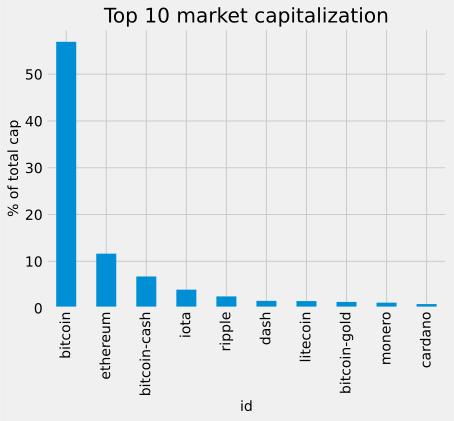

In [7]:
#How big is Bigcoin compared to other crypto?
#Goal: Plot the market capitalization for top 10 coins as barplot for better visualize this
#Title for plots 
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

#Select first 10 rows and setting index 
cap10 = cap[:10].set_index('id')

#Calculate market_cap_perc 
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd/ cap.market_cap_usd.sum())*100)

#Plotting barplot with the title defined above 
ax = cap10.market_cap_perc.plot.bar(title = TOP_CAP_TITLE)

#Annotating the y axis with the label defined above 
ax.set_ylabel(TOP_CAP_YLABEL)


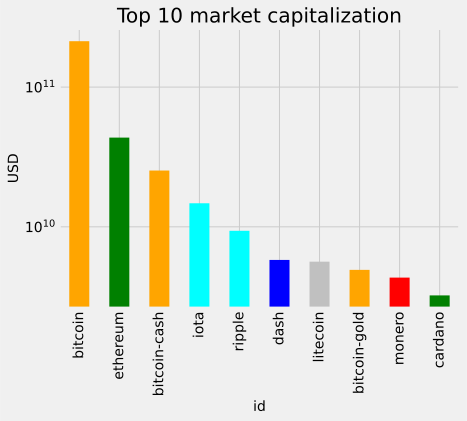

In [8]:
#Making plot easier to read and more informative 
#I'm using log10 scale instead of percentage for the 'raw' capitalization. 
#Colors group: bitcoin-cash, bitcoin-gold, Ethereum and Cardano
COLORS = ['orange', 'green','orange','cyan','cyan','blue','silver','orange','red','green']

#Plotting market_cap_usd as before but adding the colors and scaling the y-axis 
ax = cap10.market_cap_usd.plot.bar(title = TOP_CAP_TITLE, logy = True, color = COLORS)

#Annotating the y axis with 'USD'
ax.set_ylabel('USD')

#Remove xlabel 
ax.set_label('')


In [9]:
#See how crazy the volatility is in cryptocurrencies 

#Select id, percent_change_24h and percent_change_7d columns 
volatility = dec6[["id","percent_change_24h","percent_change_7d"]]

#Setting the index to 'id' and dropping all NaN rows 
volatility = volatility.set_index('id').dropna()

#Sorting the DataFrame by percent_change_24h in ascending order 
volatility = volatility.sort_values(by='percent_change_24h',ascending=True)

volatility.head()


,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


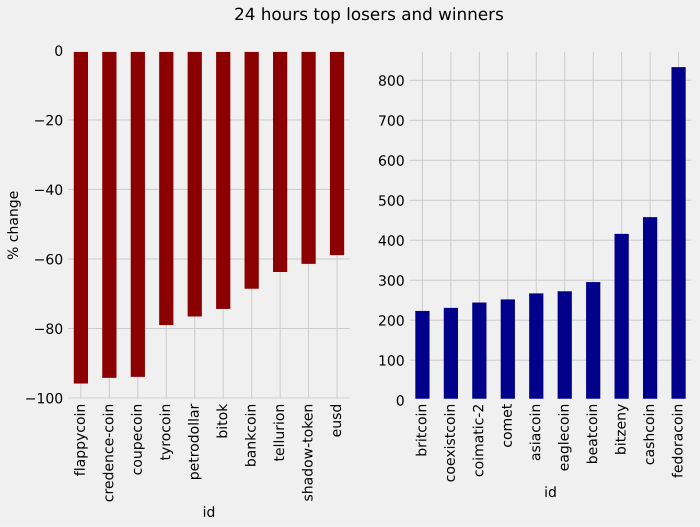

In [13]:
#Plot top 10 biggest gainers and top 10 losers in the market 
def top10_subplot(volatility_series, title):
    #Making the subplot and the figure for two side by side plots 
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    
    #Plotting with pandas and the barchart for the top 10 losers 
    ax = volatility_series[:10].plot.bar(color='darkred',ax=axes[0])
    
    #Setting the figure's main title to the text passed as parameter 
    fig.suptitle(title)
    
    #Setting ylabel to '%change'
    ax.set_ylabel('% change')
    
    #Same as above, but for the top 10 winners 
    ax = volatility_series[-10:].plot.bar(color='darkblue',ax=axes[1])
    
    return fig,ax

DTITLE = "24 hours top losers and winners"

#Calling function above with 24 hours period series and title DTITLE 
fig, ax = top10_subplot(volatility.percent_change_24h,DTITLE)